# Projek Akhir Kecerdasan Buatan - Kelompok 4

**Anggota Kelompok :**

1. Ashmaa'Ulia Safitri M - 3.34.21.0.06

2. Hanna Maghfiroh - 3.34.21.0.11

# Prepare Datasets



## Import Library

In [1]:
## Remove Warnings ##
import warnings
warnings.filterwarnings("ignore")

## Data ##
import pandas as pd
import numpy as np

## Visualization ##
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Modelling ##
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Set Up
# Colors for Plots
palette = ["#5EAFD9", "#449DD1", "#3977BB",
           "#2D51A5", "#FF4633", "#FF5746",
           "#FF5733", "#FF360B"]
cmap = ListedColormap(palette, name='c_palette')
c_palette = cmap.colors
colors = [c_palette[_] for _ in range(0, len(c_palette), 2)]
# Size for plots
set_size = (8, 8)
# Font for pots
font_hd = {'fontsize':'20', 'fontweight':'bold'}
font_lbl = {'fontsize':'12', 'fontweight':'semibold'}

## Load Dataset

In [3]:
from google.colab import files

uploaded = files.upload()

Saving ds_salaries.csv to ds_salaries.csv


In [4]:
df = pd.read_csv('ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# Data Understanding

  •	Memberikan informasi seperti jumlah data, kondisi data, dan informasi mengenai data yang digunakan

  •	Menuliskan tautan sumber data (link download).

https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

  •	Menguraikan seluruh variabel atau fitur pada data.

  •	Melakukan beberapa tahapan yang diperlukan untuk memahami data contohnya teknik visualisasi data atau exploratory data analysis.

## Note

### Information about Column:


work_year: The year the salary was paid

experience_level: EN Entry-level(Junior) MI Mid-level(Intermediate)
SE Senior-level(Expert) EX Executive-level(Director)

job_title: The role worked in during the year

salary: The total gross salary amount paid

salary_currency: The currency of the salary paid as an ISO 4217 currency code

salary_in_usd: The salary in USD

employee_residence: Employee's primary country of residence in during the work year

remote_ratio: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

company_location: The country of the mployer's main office or contracting branch

company_size: The average number of people that worked for the company during the year: S (less than 50 employees) M (50-250 employees) L (more than 250 employees)



In [5]:
df.shape

(607, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
# Memastikan Lagi bahwa data tidak ada yang null (Jika hasilnya False maka data tidak ada yang null)
print (df.isnull ().values.any())

False


In [8]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


## EDA

In [9]:
# drop Unnamed column karena tidak dipakai
df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


### Univariate Analysis

Univariate Analysis untuk eksplor lebih jauh di setiap feature

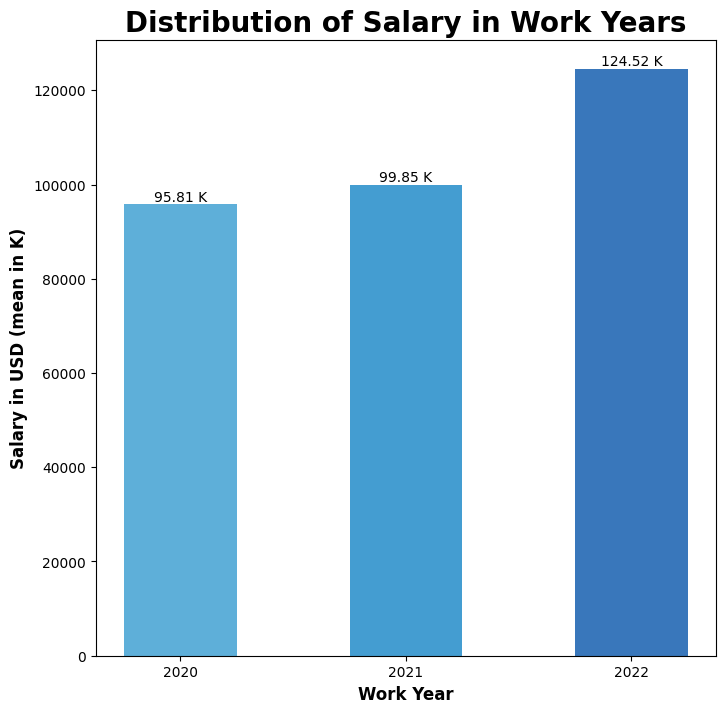

In [10]:
# Distribution of Salary

# Salary by work year
sal_dist = df[['work_year', 'salary_in_usd']]
sal_2020 = sal_dist.loc[sal_dist['work_year'] == 2020]
sal_2021 = sal_dist.loc[sal_dist['work_year'] == 2021]
sal_2022 = sal_dist.loc[sal_dist['work_year'] == 2022]
# Mean salary by work year
Y = [sal_2020['salary_in_usd'].mean(),
       sal_2021['salary_in_usd'].mean(),
       sal_2022['salary_in_usd'].mean()]
# Labels to plot
labels = np.round([Y[x]/1000 for x in range(len(Y))], 2)
labels = list(map(str, labels))
labels = [x + ' K' for x in labels]
X = ['2020', '2021', '2022']

plt.figure(figsize=set_size)
z = plt.bar(X, Y, width=0.5, color=[c_palette[0], c_palette[1], c_palette[2]])
plt.bar_label(z, labels=labels, padding=0.3)
plt.title('Distribution of Salary in Work Years', fontdict=font_hd)
plt.xlabel('Work Year', fontdict=font_lbl)
plt.ylabel('Salary in USD (mean in K)', fontdict=font_lbl)
plt.show()

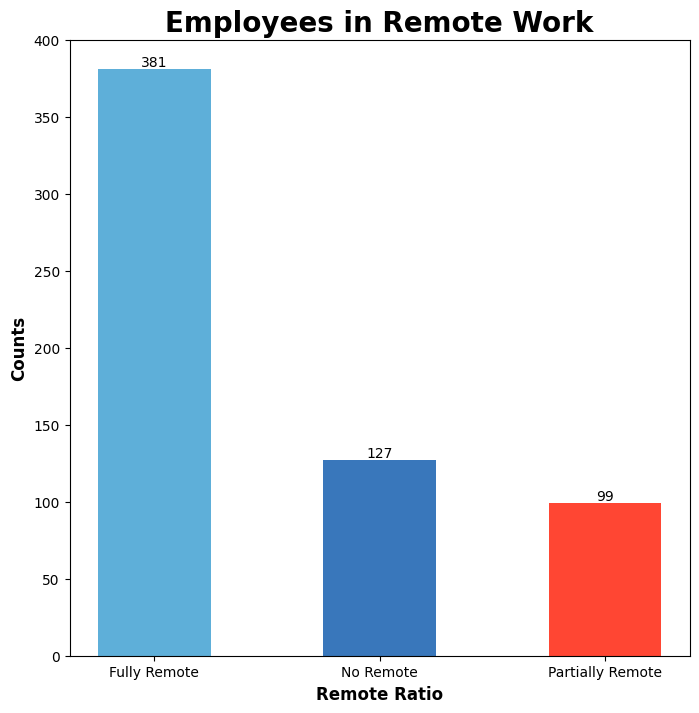

In [11]:
# Remote Ratio
# ==============
# 0: No remote work (less than 20%)
# 50: Partially Remote work
# 100: Fully remote (more than 80%)

labels = ['Fully Remote', 'No Remote', 'Partially Remote']
values = df['remote_ratio'].value_counts().to_list()

# Plot bar chart
plt.figure(figsize=set_size)
z = plt.bar(labels, values, width=0.5, tick_label=labels, color=colors)
plt.bar_label(z, labels=values)
plt.title('Employees in Remote Work', fontdict=font_hd)
plt.xlabel('Remote Ratio', fontdict=font_lbl)
plt.ylabel('Counts', fontdict=font_lbl)
plt.show()

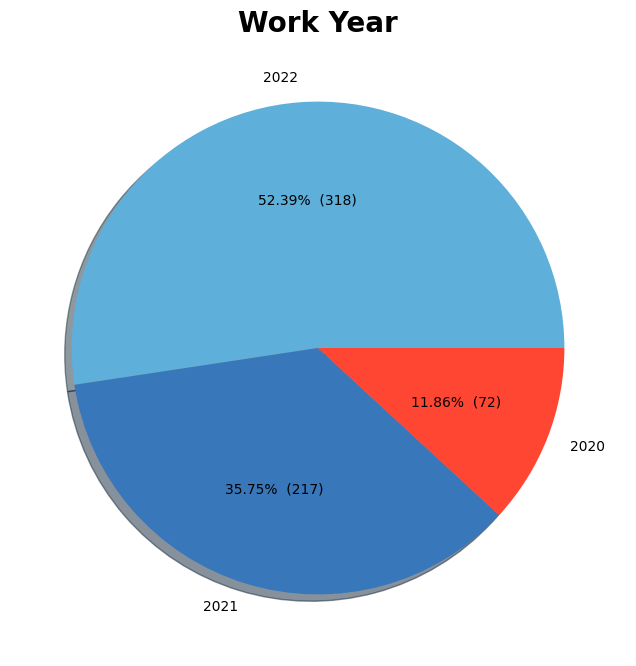

In [12]:
# Work year

# Create a function to customize autopct parameter of plt.pie()
def make_autopct(values):
    def my_autopct(pct):
        # The pct is percentage value that matplotlib supplies for every wedge
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.2f}%  ({val})'
    return my_autopct

year = df['work_year'].value_counts().index.to_list()
counts = df['work_year'].value_counts().to_list()
# Plot Pie chart
plt.figure(figsize=set_size)
plt.pie(x=counts, labels=year, colors=[c_palette[0], c_palette[2], c_palette[4]],
        autopct=make_autopct(values), shadow=True)
plt.title("Work Year", fontdict=font_hd)
plt.show()

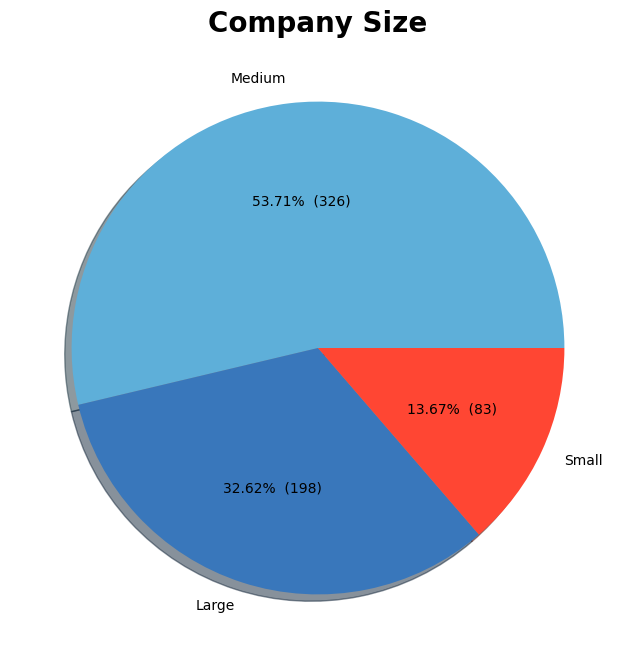

In [13]:
# Company size

# Get labels for comapny size
labels = df['company_size'].value_counts().index.to_list()
labels = ['Medium', 'Large', 'Small']
# Get values for comapny size
values = df['company_size'].value_counts().to_list()
# Plot Pie Chart
plt.figure(figsize=set_size)
plt.pie(x=values, labels=labels, colors=[c_palette[0], c_palette[2], c_palette[4], c_palette[5]],
        autopct=make_autopct(values), shadow=True)
plt.title("Company Size", fontdict=font_hd)
plt.show()

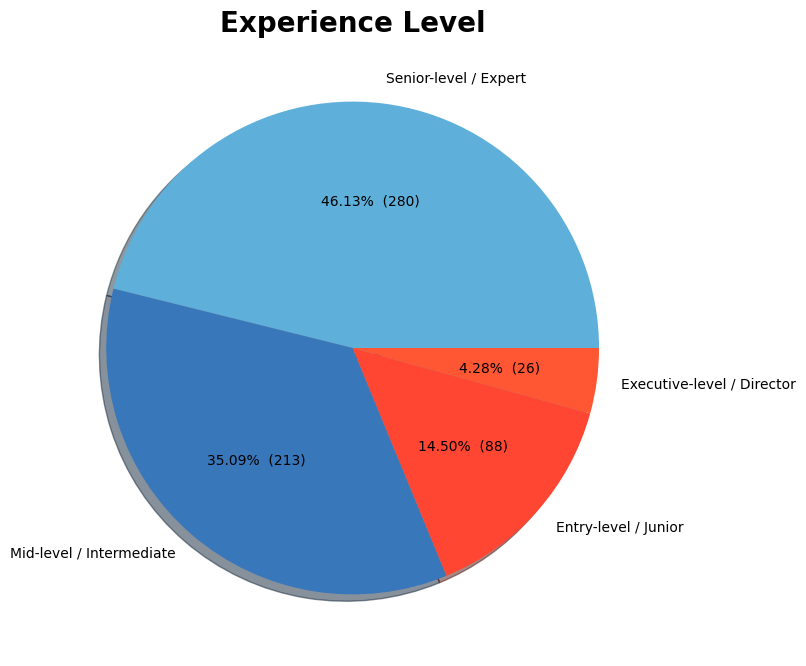

In [14]:
# Experience Level
# =================
# EN - Entry-level / Junior
# MI - Mid-level / Intermediate
# SE - Senior-level / Expert
# EX -Executive-level / Director


# Replace short forms with understandable labels
df['experience_level'].replace('EN', 'Entry-level / Junior', inplace=True)
df['experience_level'].replace('MI', 'Mid-level / Intermediate', inplace=True)
df['experience_level'].replace('SE', 'Senior-level / Expert', inplace=True)
df['experience_level'].replace('EX', 'Executive-level / Director', inplace=True)

# Set values and labels
labels = df['experience_level'].value_counts().index.to_list()
values = df['experience_level'].value_counts().to_list()

# Plot Pie Chart
plt.figure(figsize=set_size)
plt.pie(x=values, labels=labels, colors=colors,
        autopct=make_autopct(values), shadow=True)
plt.title("Experience Level", fontdict=font_hd)
plt.show()

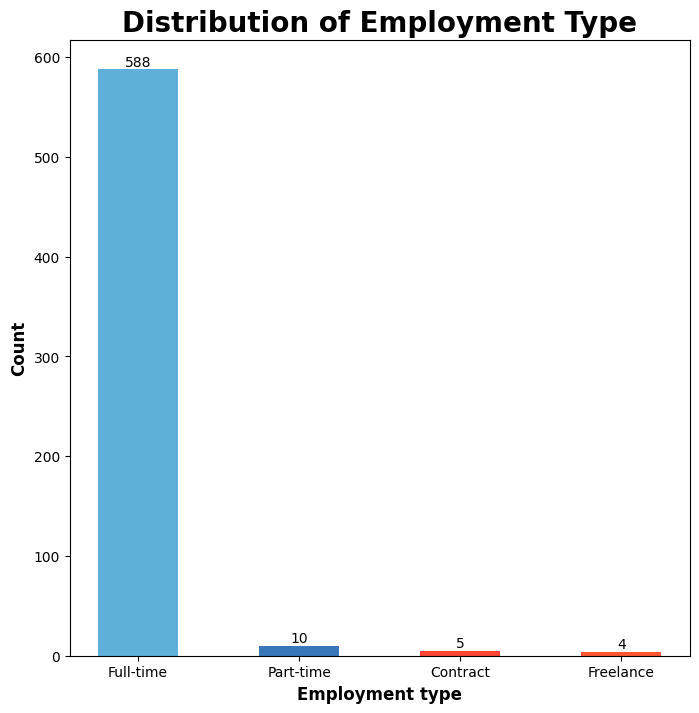

In [15]:
# Employment Type

# Replcae abrevations with Full forms
df['employment_type'].replace('PT', 'Part-time', inplace=True)
df['employment_type'].replace('CT', 'Contract', inplace=True)
df['employment_type'].replace('FL', 'Freelance', inplace=True)
df['employment_type'].replace('FT', 'Full-time', inplace=True)
# Get label and values for employment type
labels = df['employment_type'].value_counts().index.to_list()
values = df['employment_type'].value_counts().to_list()
# Plot Bar Chart
plt.figure(figsize=set_size)
z = plt.bar(x=labels, height=values, width=0.5, color=colors)
plt.bar_label(z, labels=values, label_type='edge')
plt.title('Distribution of Employment Type', fontdict=font_hd)
plt.xlabel('Employment type', fontdict=font_lbl)
plt.ylabel('Count', fontdict=font_lbl)
plt.show()

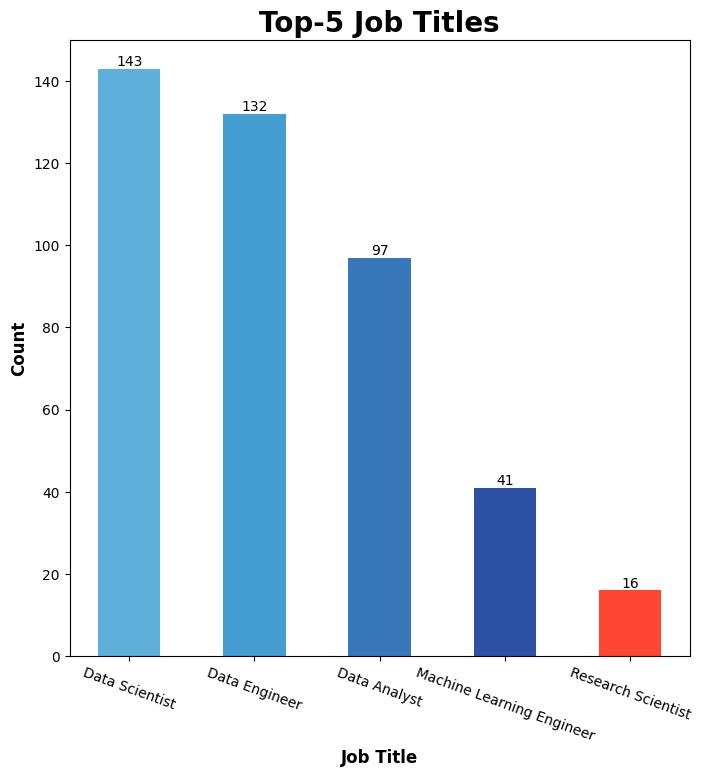

In [16]:
# Job Title
# ===========
# Karena Jumlah Judul Pekerjaan Cukup Banyak maka akan ditampilkan top 5 judul pekerjaan saja

# Get label and values for top 5 job titles
top_roles = df['job_title'].value_counts()[:5]
x = top_roles.index
y = top_roles.values
# Plot bar graph
plt.figure(figsize=set_size)
z = plt.bar(x=x, height=y, width=0.5, color=c_palette)
plt.bar_label(container=z, labels=y)
plt.title('Top-5 Job Titles', fontdict=font_hd)
plt.xlabel('Job Title', fontdict=font_lbl)
plt.ylabel('Count', fontdict=font_lbl)
plt.xticks(rotation=-20)
plt.ylim(0, 150)
plt.show()


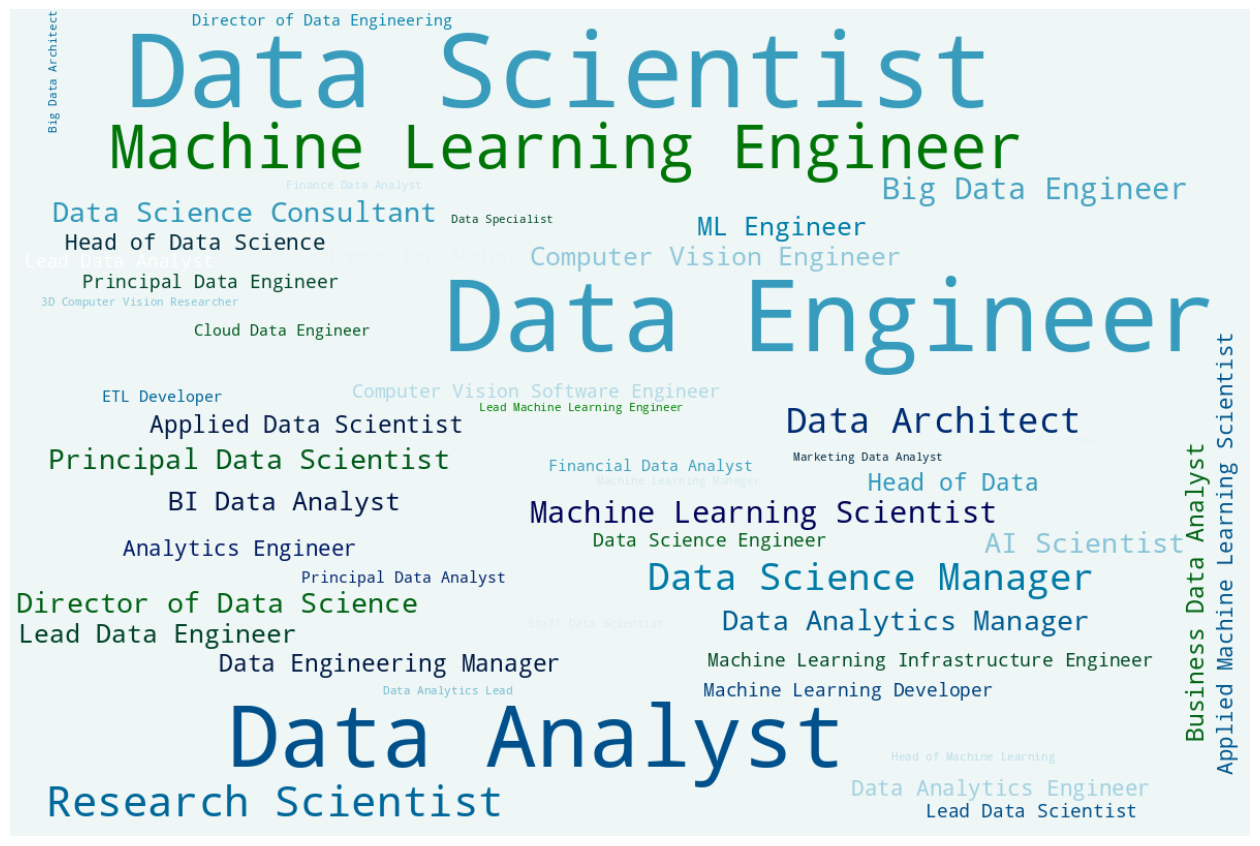

In [17]:
# Untuk Menampilkan Semua Judul Pekerjaan menggunakan Word Cloud

def frequency_df(wordlist):
    """
    Parameter: A list of type string.
    Returns: DataFrame with frequency distribution of strings.
    """
    freq_dist = nltk.FreqDist(wordlist)
    df_freq = pd.DataFrame.from_dict(freq_dist, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Title'
    df_freq = df_freq.sort_values(by=['Frequency'], ascending=False).reset_index()
    return df_freq

# Create data for WordCloud
wordlist = df['job_title'].values.tolist()
df_freq = frequency_df(wordlist)
data = dict(zip(df_freq['Title'].tolist(), df_freq['Frequency'].tolist()))
# Create WordCloud
plt.figure(figsize=(16, 12))
wc = WordCloud(width=1200,
              height=800,
              max_words=50,
              background_color='#EEF7F6',
              max_font_size=100,
              random_state=42,
              colormap='ocean').generate_from_frequencies(data)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

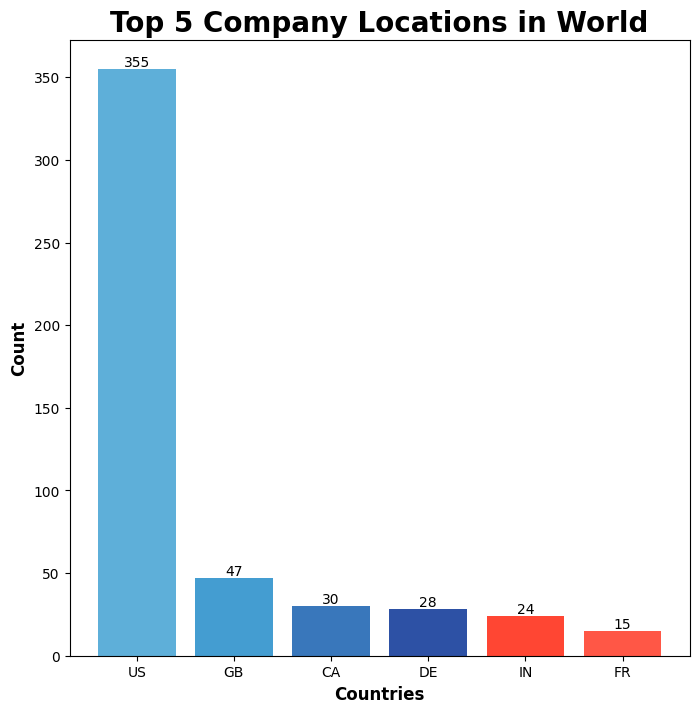

In [18]:
# Company Location

# Get data for top 5 countries
country = df['company_location'].value_counts().index.to_list()
val = df['company_location'].value_counts().to_list()
top_5_cont = country[:6]
top_5_val = val[:6]
# Plot bar chart
plt.figure(figsize=set_size)
z = plt.bar(x=top_5_cont, height=top_5_val, color=c_palette)
plt.bar_label(z, labels=top_5_val)
plt.title('Top 5 Company Locations in World', fontdict=font_hd)
plt.xlabel('Countries', fontdict=font_lbl)
plt.ylabel('Count', fontdict=font_lbl)
plt.show()

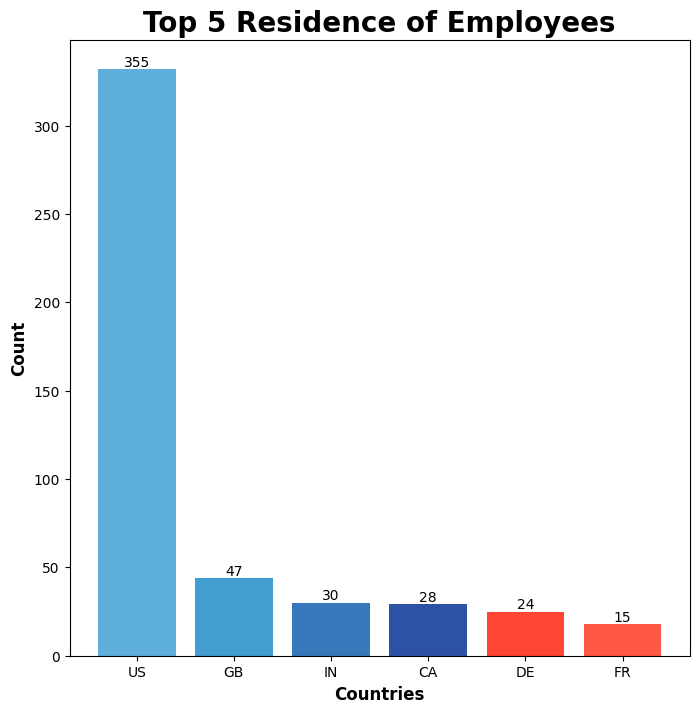

In [19]:
# Employee Residence

# Get data for top 5 residence of employees
countries = df['employee_residence'].value_counts().index.to_list()
count = df['employee_residence'].value_counts().to_list()
top_5_res = countries[:6]
top_5_count = count[:6]
# Plot bar chart
plt.figure(figsize=set_size)
z = plt.bar(x=top_5_res, height=top_5_count, color=c_palette)
plt.bar_label(z, labels=top_5_val)
plt.title('Top 5 Residence of Employees', fontdict=font_hd)
plt.xlabel('Countries', fontdict=font_lbl)
plt.ylabel('Count', fontdict=font_lbl)
plt.show()

### Multivariate Analysis

Multivariate Analysis untuk Eksplor lebih jauh hubungan antaran setiap feature dengan feature lainnya


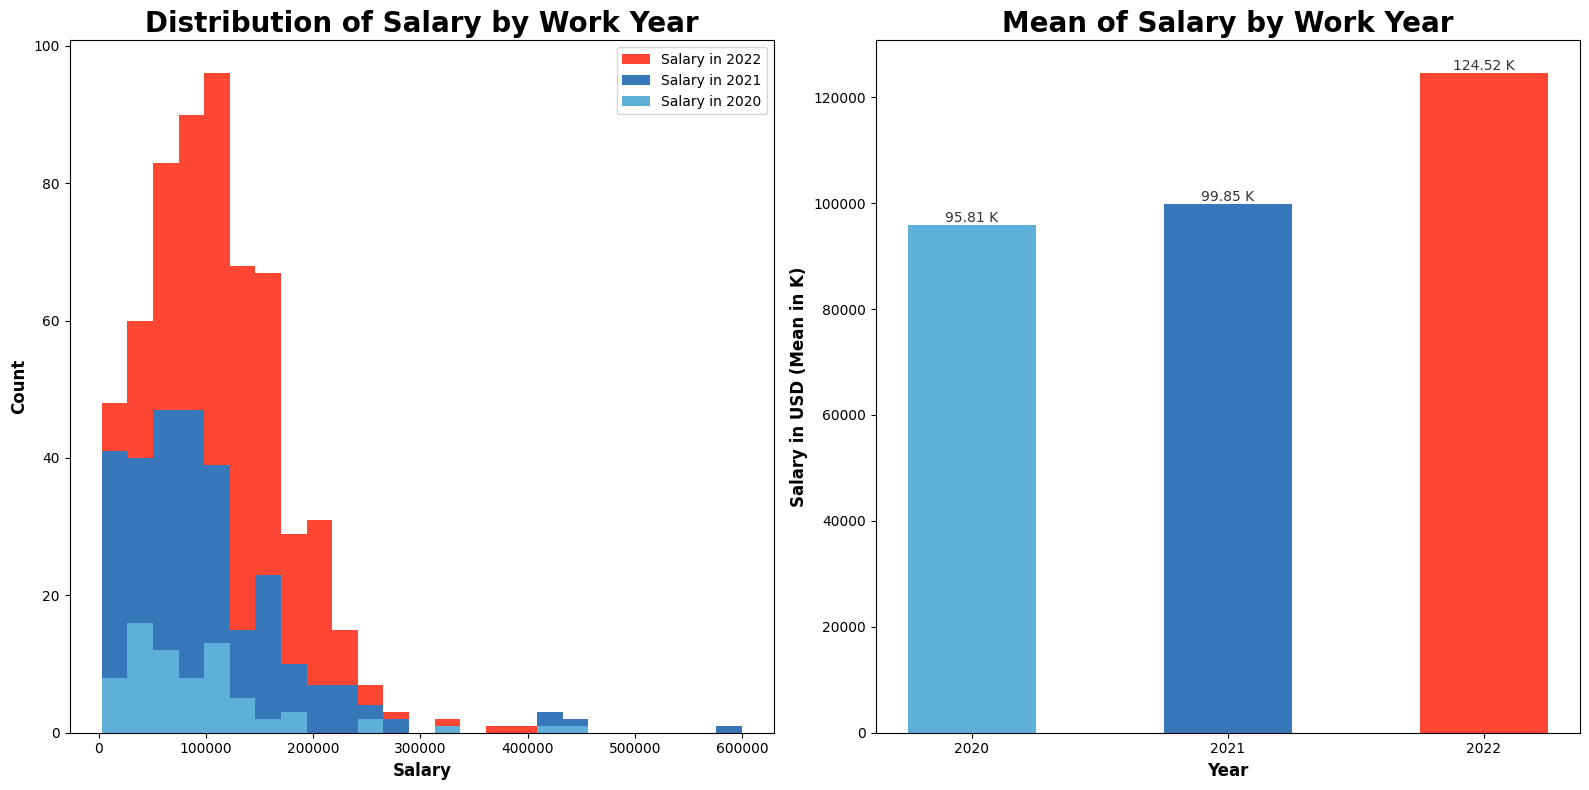

In [20]:
# Relation between Salary in USD and Work Year

# Group data by year
year_2020 = df.loc[(df['work_year'] == 2020)]
year_2021 = df.loc[(df['work_year'] == 2021)]
year_2022 = df.loc[(df['work_year'] == 2022)]

plot_data = [year_2020['salary_in_usd'],
            year_2021['salary_in_usd'],
            year_2022['salary_in_usd']]
labels = ['Salary in 2020', 'Salary in 2021', 'Salary in 2022']

# Find mean of salary for each work year
wy_sal = pd.DataFrame(columns=['2020', '2021', '2022'])
wy_sal['2020'] = year_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
wy_sal['2021'] = year_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
wy_sal['2022'] = year_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

# Plot distribution of salary
fig, axes = plt.subplots(figsize=(16, 8), nrows=1, ncols=2)
axes[0].hist(plot_data, bins=25, histtype='stepfilled',color=[c_palette[0], c_palette[2], c_palette[4]],
             label=labels, stacked=True)
axes[0].legend()
axes[0].set_title('Distribution of Salary by Work Year', fontdict=font_hd)
axes[0].set_xlabel('Salary', fontdict=font_lbl)
axes[0].set_ylabel('Count', fontdict=font_lbl)

# Gather data to plot mean
x = wy_sal.columns.values.astype(int)
h = wy_sal.values.tolist()[0]
labels = np.round([num/1000 for num in wy_sal.values.tolist()[0]], 2)
labels = list(map(str, labels))
new_labels = [labels[i] + ' K' for i in range(len(labels))]
colors = [c_palette[0], c_palette[2], c_palette[4]]

# Plot mean using bar plot
bar = plt.bar(x, h, width=0.5, color=colors,
       tick_label=[2020, 2021, 2022])
axes[1].bar_label(bar, new_labels, fmt='%b', alpha=0.8, padding=0.3)
# plt.yticks(ticks=plt.yticks()[1:], labels=[a/1000 for a in plt.yticks()[0]])
axes[1].set_title('Mean of Salary by Work Year', fontdict=font_hd)
axes[1].set_xlabel('Year', fontdict=font_lbl)
axes[1].set_ylabel('Salary in USD (Mean in K)', fontdict=font_lbl)
plt.tight_layout()
plt.show()

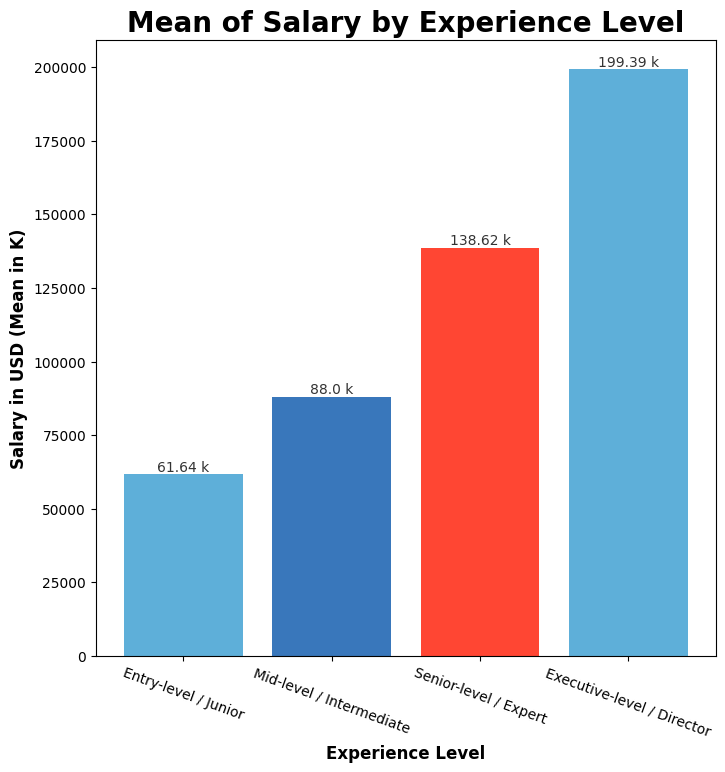

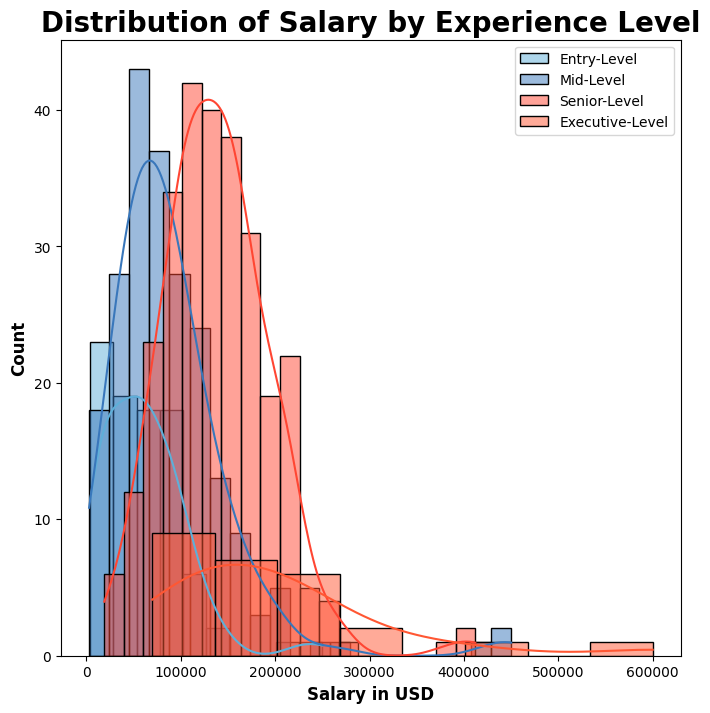

In [21]:
#  Relation between Salary and Experience Level

# Get data for salary and experience level
exp_sal = df[['experience_level', 'salary_in_usd']]

# Get salaries by experience level
entry_lev = exp_sal.loc[exp_sal['experience_level'] == 'Entry-level / Junior']
mid_lev = exp_sal.loc[exp_sal['experience_level'] == 'Mid-level / Intermediate']
senior_lev = exp_sal.loc[exp_sal['experience_level'] == 'Senior-level / Expert']
executive_lev = exp_sal.loc[exp_sal['experience_level'] == 'Executive-level / Director']

labels = ['Entry-level / Junior', 'Mid-level / Intermediate',
          'Senior-level / Expert', 'Executive-level / Director']
values = [entry_lev['salary_in_usd'].mean(), mid_lev['salary_in_usd'].mean(),
         senior_lev['salary_in_usd'].mean(), executive_lev['salary_in_usd'].mean()]

# Format 'values' for mean
values_fmt = np.round([x/1000 for x in values], 2)
values_fmt = list(map(str, values_fmt))
values_fmt = [values_fmt[i] + ' k' for i in range(len(values_fmt))]

# Plot a bar graph
plt.figure(figsize=set_size)
plt.xticks(rotation=-20)
bar = plt.bar(labels, values, color=colors)
plt.bar_label(bar, values_fmt, fmt='%b', alpha=0.8)
plt.title('Mean of Salary by Experience Level', fontdict=font_hd)
plt.xlabel('Experience Level', fontdict=font_lbl)
plt.ylabel('Salary in USD (Mean in K)', fontdict=font_lbl)
plt.show()

# KDE Plot
plt.figure(figsize=set_size)
sns.histplot(entry_lev['salary_in_usd'], color=c_palette[0], label="Entry-Level", kde=True)
sns.histplot(mid_lev['salary_in_usd'], color=c_palette[2], label="Mid-Level", kde=True)
sns.histplot(senior_lev['salary_in_usd'], color=c_palette[4], label="Senior-Level", kde=True)
sns.histplot(executive_lev['salary_in_usd'], color=c_palette[6], label="Executive-Level", kde=True)
plt.title('Distribution of Salary by Experience Level', fontdict=font_hd)
plt.xlabel('Salary in USD', fontdict=font_lbl)
plt.ylabel('Count', fontdict=font_lbl)
plt.legend()
plt.show()


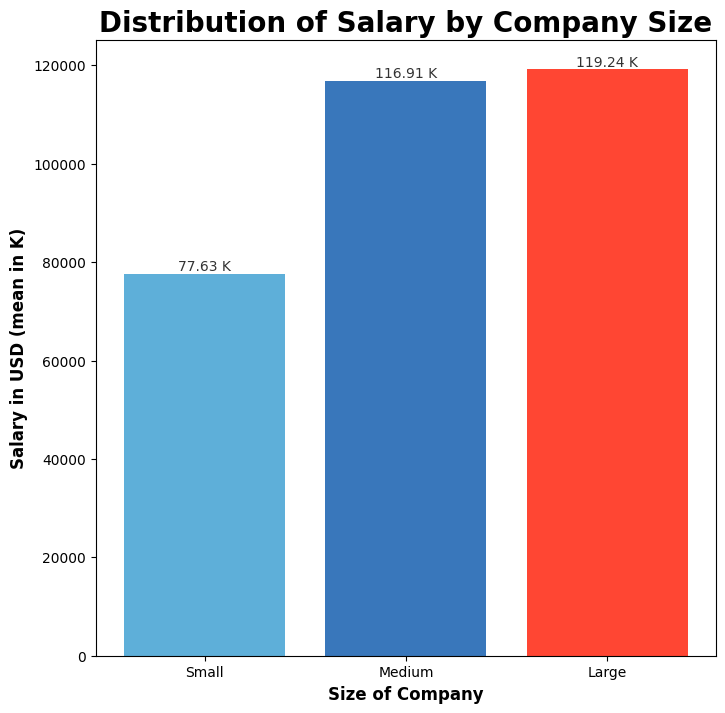

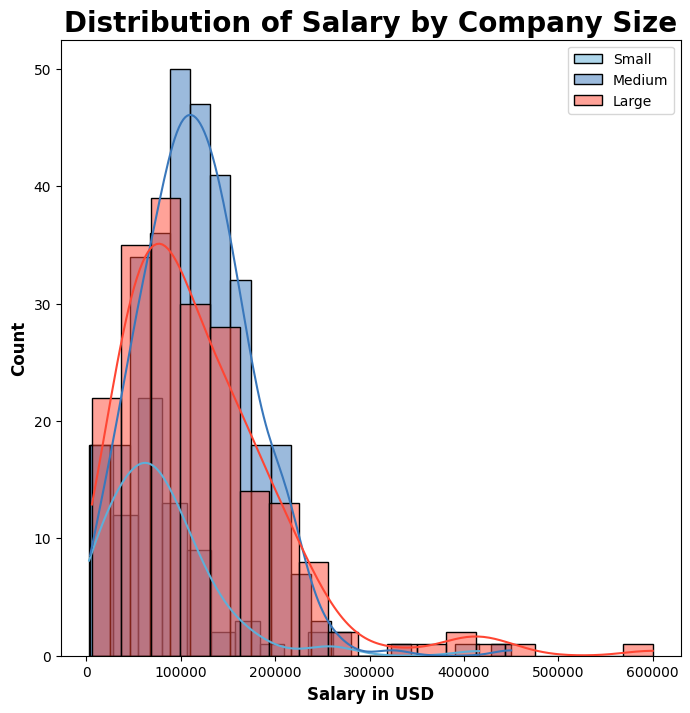

In [22]:
# Distribution of Salary by Company Size

sal_co = df[['salary_in_usd', 'company_size']]

# Get salaries in clusters of size of companies
sal_S = sal_co.loc[sal_co['company_size'] == 'S']
sal_M = sal_co.loc[sal_co['company_size'] == 'M']
sal_L = sal_co.loc[sal_co['company_size'] == 'L']
labels = ['Small', 'Medium', 'Large']

# Get mean salary by company size
sal_mean = [sal_S['salary_in_usd'].mean(), sal_M['salary_in_usd'].mean(),
            sal_L['salary_in_usd'].mean()]
fmt_labels = np.round([x/1000 for x in sal_mean], 2)
fmt_labels = list(map(str, fmt_labels))
fmt_labels = [x + ' K' for x in fmt_labels]

# Plot bar chart
plt.figure(figsize=set_size)
z = plt.bar(labels, sal_mean, color=colors)
plt.bar_label(z, fmt_labels, alpha=0.8)
plt.title('Distribution of Salary by Company Size', fontdict=font_hd)
plt.xlabel('Size of Company', fontdict=font_lbl)
plt.ylabel('Salary in USD (mean in K)', fontdict=font_lbl)
plt.show()

# KDE plot
plt.figure(figsize=set_size)
sns.histplot(sal_S['salary_in_usd'], color=c_palette[0], label="Small", kde=True)
sns.histplot(sal_M['salary_in_usd'], color=c_palette[2], label="Medium", kde=True)
sns.histplot(sal_L['salary_in_usd'], color=c_palette[4], label="Large", kde=True)
plt.title('Distribution of Salary by Company Size', fontdict=font_hd)
plt.xlabel('Salary in USD', fontdict=font_lbl)
plt.ylabel('Count', fontdict=font_lbl)
plt.legend()
plt.show()

In [23]:
# Correlation between Attributes in Data

# Get numeric and categorical columns
num_attribs = ['work_year', 'salary_in_usd', 'remote_ratio']
cat_attribs = [df.columns[i] for i in range(len(df.columns)) if df.columns[i] not in num_attribs]
# Create a DataFrame with only numeric values
num_df = df[num_attribs]
# Create a DataFrame with only categorical values
cat_df = df[cat_attribs]
# Apply OrdinalEncoder from sklearn (assigns numeric values to categorical features)
ordinal_enc = OrdinalEncoder()
cat_df_enc = ordinal_enc.fit_transform(cat_df)
# Convert numpy array to pandas DataFrame
cat_enc_df = pd.DataFrame(data=cat_df_enc, columns=cat_attribs)
# Join encoded df and numeric df
enc_df = num_df.join(cat_enc_df)
enc_df.head()

,work_year,salary_in_usd,remote_ratio,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,2020,79833,0,2.0,2.0,22.0,14.0,12.0,0.0
1,2020,260000,0,3.0,2.0,41.0,32.0,29.0,2.0
2,2020,109024,50,3.0,2.0,7.0,20.0,18.0,1.0
3,2020,20000,0,2.0,2.0,47.0,23.0,20.0,2.0
4,2020,150000,50,3.0,2.0,38.0,55.0,48.0,0.0


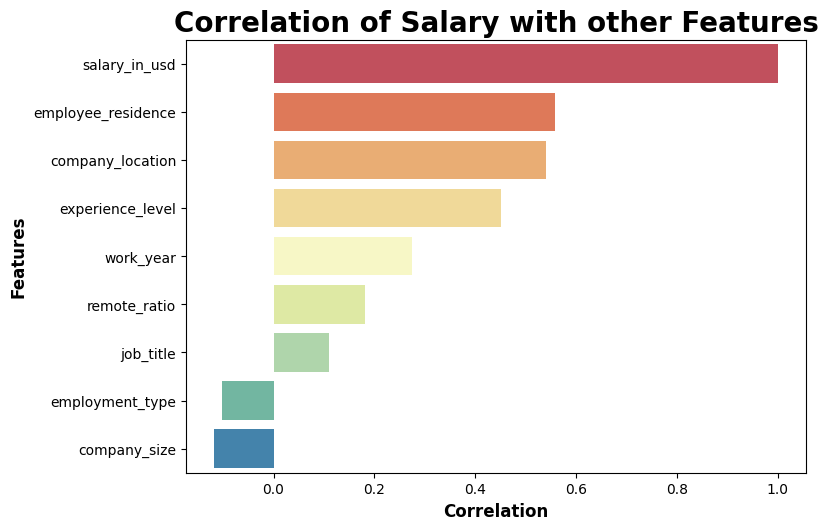

In [24]:
# Spearman Correlation

# Get correlation matrix
corr_matrix = enc_df.corr(method='spearman')
spr = corr_matrix['salary_in_usd'].sort_values(ascending=False)
# Plot confusion matrix
plt.figure(figsize=(8, (0.625*len(spr.index))))
sns.barplot(x=spr.values, y=spr.index, orient='h', palette="Spectral", )
plt.title("Correlation of Salary with other Features", fontdict=font_hd)
plt.xlabel("Correlation", fontdict=font_lbl)
plt.ylabel("Features", fontdict=font_lbl)
plt.show()

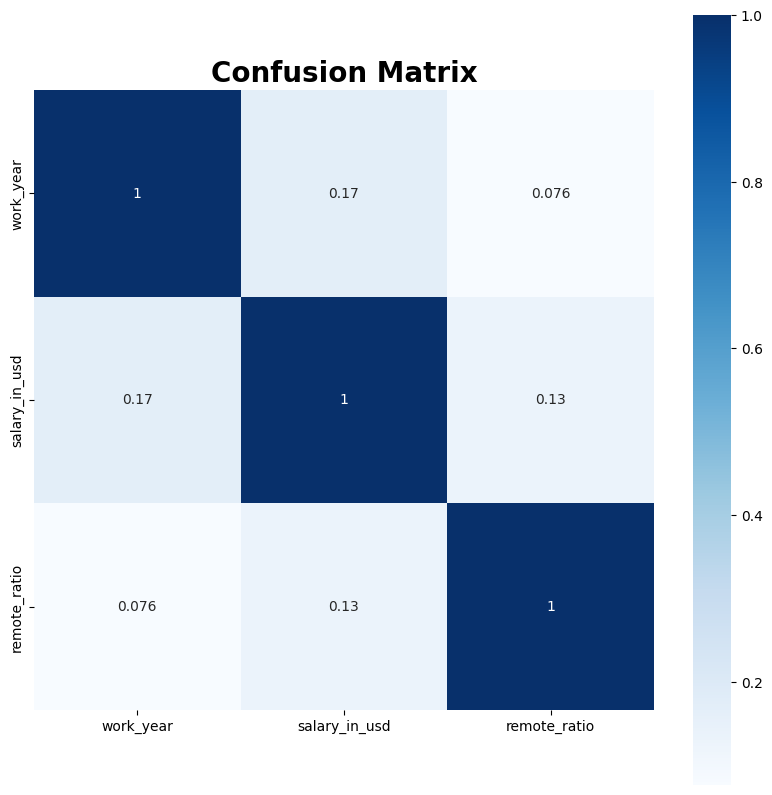

In [25]:
# Confusion Matrix for Salary, Work year and Remote Ratio

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, square=True, cbar=True, cmap="Blues")
plt.title("Confusion Matrix", fontdict=font_hd)
plt.show()

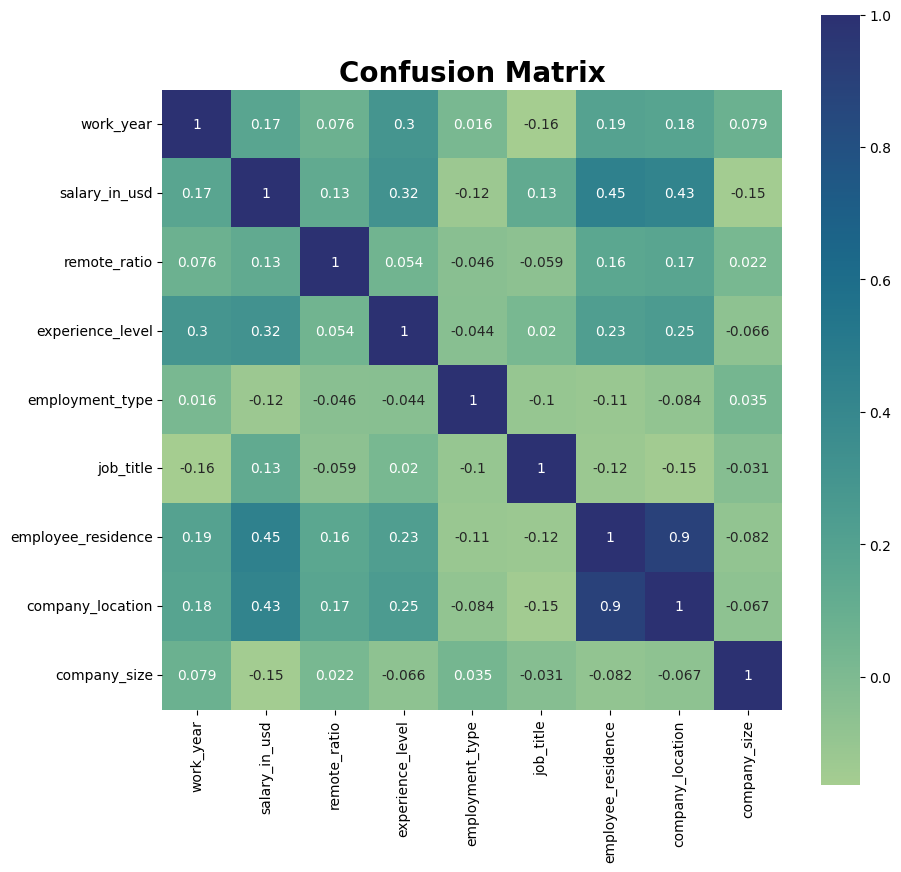

In [26]:
# Confusion Matrix for all Attributes

plt.figure(figsize=(10, 10))
sns.heatmap(enc_df.corr(), annot=True, square=True, cbar=True, cmap="crest")
plt.title("Confusion Matrix", fontdict=font_hd)
plt.show()

# Data Preparation

•	Menerapkan dan menyebutkan teknik data preparation yang dilakukan.

•	Teknik yang digunakan pada notebook dan laporan harus berurutan.

•	Menjelaskan proses data preparation yang dilakukan

•	Menjelaskan alasan mengapa diperlukan tahapan data preparation tersebut.



#### Membuat Fungsi yang akan digunakan untuk Modeling

**evaluate**: Fungsi ini mencetak nilai RMSE berdasarkan model yang diberikan, X_train, X_test, y_train, dan y_test.

**avg_rmse_cv**: Fungsi ini melakukan validasi silang 5 fold untuk mendapatkan skor evaluasi yang lebih akurat berdasarkan model yang diberikan.

**print_best_params**: Fungsi ini mencetak RMSE terbaik yang telah dioptimalkan setelah validasi silang 5 fold dan parameter terbaik yang diberikan model dan grid parameter.

**select_best_features**: Fungsi ini menghapus fitur dengan tingkat penting yang kurang dari atau sama dengan nol, sehingga dapat mengembalikan dataframe fitur X dengan fitur terbaik. Fungsi ini khusus untuk model linear.

**select_best_features_nonlinear**: Fungsi ini memilih fitur penting teratas. Fungsi ini khusus untuk model non-linear.

In [27]:
# evaluate

def evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('###', model.__class__.__name__, '###')
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print('RMSE: {0: .3f}'.format(rmse))

In [28]:
# avg_rmse_cv

def avg_rmse_cv(model):
    rmse_list = np.sqrt(-cross_val_score(model, X_features_ohe, log_y_target,
                                             scoring='neg_mean_squared_error', cv=5))
    rmse_avg = np.mean(rmse_list)
    print('{0} 5 Fold CV RMSE List: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
    print('{0} 5 Fold CV Average RMSE: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))

In [29]:
# print_best_params

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features_ohe, log_y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} Optimized RMSE after 5 Fold CV: {1}, Best Parameter: {2}'
          .format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [30]:
# select_best_features

def select_best_features(model):
    remove_feature_lst = []
    coef = pd.Series(model.coef_, index=X_features_ohe.columns)
    for index, value in coef.iteritems():
        if value <= 0:
            remove_feature_lst.append(index)
    print('{0}: {1} features dropped'.format(model.__class__.__name__, len(remove_feature_lst)))
    X_best_features = X_features_ohe.drop(remove_feature_lst, axis=1, inplace=False)
    return X_best_features

In [31]:
# select_best_features_nonlinear

def select_best_features_nonlinear(model):
    coef = pd.Series(model.feature_importances_, index=X_features_ohe.columns)
    remove_feature_lst = coef.sort_values(ascending=False)[10:].index
    X_best_features = X_features_ohe.drop(remove_feature_lst, axis=1, inplace=False)
    return X_best_features

#### Selection Feature

In [32]:
y_target = df['salary_in_usd']
X_features = df.drop(['salary_in_usd', 'job_title', 'employee_residence', 'company_location'], axis=1, inplace=False)

In [33]:
log_y_target = np.log1p(y_target)

#### Split Train dan Test Dataset

In [34]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         607 non-null    int64 
 1   experience_level  607 non-null    object
 2   employment_type   607 non-null    object
 3   remote_ratio      607 non-null    int64 
 4   company_size      607 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.8+ KB


In [35]:
X_features_ohe = pd.get_dummies(X_features)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, log_y_target, test_size=0.3, random_state=156)

# Modeling

mencari tahu model dari Algoritma mana diantara (Linear Regression ,Ridge Regression, Lasso Regression, Random Forest Regression Analysis, dan XGBoost) yang memberikan representasi dataset yang paling akurat dengan meminimalkan kesalahan root mean squared error (RMSE). Berdasarkan hasil model, kami akan mencari tahu faktor mana yang memiliki dampak terbesar pada salary.

#### Linear Regression

In [37]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

linear_models = [lr_reg, ridge_reg, lasso_reg]

for model in linear_models:
    evaluate(model, X_train, X_test, y_train, y_test)
    avg_rmse_cv(model)

### LinearRegression ###
RMSE:  0.627
LinearRegression 5 Fold CV RMSE List: [0.819 0.867 0.522 0.482 0.54 ]
LinearRegression 5 Fold CV Average RMSE: 0.646
### Ridge ###
RMSE:  0.630
Ridge 5 Fold CV RMSE List: [0.818 0.868 0.519 0.481 0.531]
Ridge 5 Fold CV Average RMSE: 0.643
### Lasso ###
RMSE:  0.801
Lasso 5 Fold CV RMSE List: [0.908 1.036 0.614 0.611 0.636]
Lasso 5 Fold CV Average RMSE: 0.761


#### Random Forest Regresstion

In [38]:
rf_reg = RandomForestRegressor(random_state=156)

evaluate(rf_reg, X_train, X_test, y_train, y_test)
avg_rmse_cv(rf_reg)

### RandomForestRegressor ###
RMSE:  0.649
RandomForestRegressor 5 Fold CV RMSE List: [0.864 0.87  0.544 0.541 0.547]
RandomForestRegressor 5 Fold CV Average RMSE: 0.673


#### XGBoost Regression

In [39]:
xgb_reg = XGBRegressor(n_estimators=500, random_state=156)

evaluate(xgb_reg, X_train, X_test, y_train, y_test)
avg_rmse_cv(xgb_reg)

### XGBRegressor ###
RMSE:  0.646
XGBRegressor 5 Fold CV RMSE List: [0.903 0.88  0.556 0.543 0.59 ]
XGBRegressor 5 Fold CV Average RMSE: 0.694


# Evaluation

Menggunakan Evaluasi Metrix yaitu RMSE (Root Mean Squared Error)

#### Evaluation Model Linear Regression


In [40]:
lr_models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
fig = go.Figure(data=[
    go.Bar(name='Default Parameter', x=lr_models, y=[0.646, 0.643, 0.761], text=[0.535, 0.527, 0.761]),
])
fig.update_layout(
    title_text='Linear Regression Summary',
    height=400,
    width=600,
    barmode='group',
    xaxis=dict(
        title='Models',
        titlefont_size=16
    ),
    yaxis=dict(
        title='RMSE',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=8
)
fig.show()

#### Evaluation Random Forest Regression

In [41]:
fig = go.Figure(data=[
    go.Bar(name='Random Forest',
           x=['Default Paramter'],
           y=[0.673],
           text=[0.673],
           marker_color=['#264b96', '#bf212f', '#006f3c']
          )
])
fig.update_layout(
    title_text='Random Forest Summary',
    height=400,
    width=600,
    xaxis=dict(
        title='Methods',
        titlefont_size=16
    ),
    yaxis=dict(
        title='RMSE',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

#### Evaluation XGBoost Regression

In [42]:
fig = go.Figure(data=[
    go.Bar(name='XGBoost',
           x=['Default Paramter'],
           y=[0.694],
           text=[0.694],
           marker_color=['#264b96', '#bf212f', '#006f3c']
          )
])
fig.update_layout(
    title_text='XGBoost Summary',
    height=400,
    width=600,
    xaxis=dict(
        title='Methods',
        titlefont_size=16
    ),
    yaxis=dict(
        title='RMSE',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

# Summary Best Model


In [43]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest Regression', 'XGBoost Regression']
fig = go.Figure(data=[
    go.Bar(name='Default Parameter', x=models, y=[0.646, 0.643, 0.761, 0.673, 0.597], text=[0.535, 0.527, 0.761, 0.565, 0.694]),
])
fig.update_layout(
    title_text='Modelling Summary',
    height=400,
    width=800,
    barmode='group',
    xaxis=dict(
        title='Models',
        titlefont_size=16
    ),
    yaxis=dict(
        title='RMSE',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=8
)
fig.show()

In [44]:
#Karena Hasill Evaluasi RMSE nya Paling rendah adalah Ridge Regression Maka, Model terbaik yang cocok digunakan untuk mengolah data yaitu Ridge Regression